Variance: 17970526.0857, Bias2: 17969872.3617, Total error: 35940398.4474
Variance: 5649084.1785, Bias2: 5647851.0149, Total error: 11296935.1933
Variance: 316079269.5844, Bias2: 316420248.3926, Total error: 632499517.9769
Variance: 200546755.6958, Bias2: 200074790.9147, Total error: 400621546.6105
Variance: 265406585.6930, Bias2: 265915821.7460, Total error: 531322407.4390
Degree: 1, Avg MSE: 161221.1141, Bias²: 161205716.8860, Variance: 161130444.2475, Test MSE: 198217.9936, Test R²: 0.9995, Test RMSE: 445.2168
Variance: 1087353.1998, Bias2: 46254452.7121, Total error: 47341805.9119
Variance: 3479259.5927, Bias2: 21255268.1381, Total error: 24734527.7308
Variance: 1237398972.1303, Bias2: 316434490.7873, Total error: 1553833462.9176
Variance: 220005531.7984, Bias2: 219959715.5553, Total error: 439965247.3536
Variance: 625477425.2336, Bias2: 265953486.3011, Total error: 891430911.5347
Degree: 2, Avg MSE: 245988020.9775, Bias²: 173971482.6988, Variance: 417489708.3909, Test MSE: 2257414

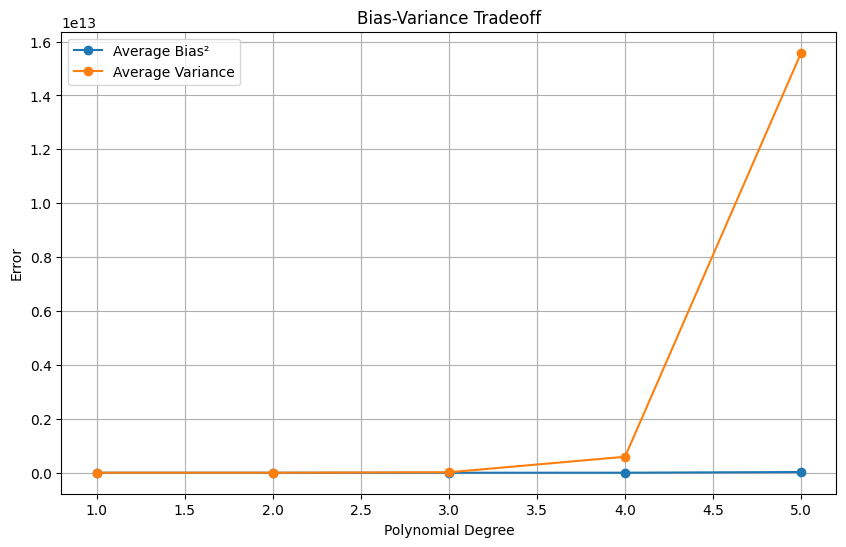

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=42):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    mse_list = []
    bias2_list = []
    variance_list = []
    models = []

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)

        # Calculate bias² and variance for this fold
        y_pred_mean = np.mean(y_pred)
        bias2 = np.mean((y_pred_mean - y_test)**2)
        variance = np.mean((y_pred - y_pred_mean)**2)
        bias2_list.append(bias2)
        variance_list.append(variance)

        # Append results to lists
        models.append(model)

        # Print results for this fold
        print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance, bias2, bias2 + variance))

    # Calculate average metrics across folds
    avg_mse = np.mean(mse_list)
    avg_bias2 = np.mean(bias2_list)
    avg_variance = np.mean(variance_list)

    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=random_state)
    # Choose the model with the lowest fold MSE
    best_model = models[np.argmin(mse_list)]
    y_pred_on_test = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred_on_test)
    test_r2 = r2_score(y_test, y_pred_on_test)
    test_rmse = np.sqrt(test_mse)

    return avg_mse, avg_bias2, avg_variance, test_mse, test_r2, test_rmse, best_model

# Load the dataset
btc_data = pd.read_csv('BTC-USD_stock_data.csv')

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

X = btc_data[features]
y = btc_data[target]

degrees = range(1, 6)
bias2_list, variance_list, mse_list = [], [], []

for degree in degrees:
    avg_mse, avg_bias2, avg_variance, test_mse, test_r2, test_rmse, best_model = polynomial_regression(degree, X, y, folds=5)
    mse_list.append(avg_mse)
    bias2_list.append(avg_bias2)
    variance_list.append(avg_variance)
    print(f"Degree: {degree}, Avg MSE: {avg_mse:.4f}, Bias²: {avg_bias2:.4f}, Variance: {avg_variance:.4f}, Test MSE: {test_mse:.4f}, Test R²: {test_r2:.4f}, Test RMSE: {test_rmse:.4f}")

# Plot Bias-Variance Tradeoff
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias2_list, marker='o', label='Average Bias²')
plt.plot(degrees, variance_list, marker='o', label='Average Variance')
plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.title("Bias-Variance Tradeoff")
plt.show()

